In [16]:
import openslide
import random
import numpy as np
import PIL
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
import glob
import pickle
%matplotlib inline

In [7]:
slide_dir = '/home/roskach/Курсач/slides/'
slide_paths = glob.glob(slide_dir + '*')
print(slide_paths)

['/home/roskach/Курсач/slides/patient_040_node_1.tif', '/home/roskach/Курсач/slides/patient_040_node_4.tif', '/home/roskach/Курсач/slides/Tumor_003.tif', '/home/roskach/Курсач/slides/patient_040_node_3.tif', '/home/roskach/Курсач/slides/patient_041_node_3.tif', '/home/roskach/Курсач/slides/Tumor_043.tif', '/home/roskach/Курсач/slides/patient_041_node_0.tif', '/home/roskach/Курсач/slides/Tumor_017.tif', '/home/roskach/Курсач/slides/Tumor_001.tif', '/home/roskach/Курсач/slides/Tumor_015.tif', '/home/roskach/Курсач/slides/Tumor_016.tif', '/home/roskach/Курсач/slides/patient_040_node_2.tif', '/home/roskach/Курсач/slides/Tumor_044.tif', '/home/roskach/Курсач/slides/patient_041_node_4.tif', '/home/roskach/Курсач/slides/Tumor_041.tif', '/home/roskach/Курсач/slides/patient_040_node_0.tif', '/home/roskach/Курсач/slides/patient_041_node_1.tif']


In [8]:
tile_size = 100

In [4]:
def plot_figures(imgs, columns=1):
    figure = plt.figure(figsize=(20, 20 * int(len(imgs) / (columns ** 2))))
    rows = int(len(imgs) / columns)
    k = 1
    for img in imgs:
        ax = figure.add_subplot(rows, columns, k)
        ax.imshow(img)
        ax.axis('off')
        k += 1

In [9]:
final_imgs = []
for slide_path in slide_paths:
    slide = openslide.open_slide(slide_path)
    imgs = []
    while len(imgs) < 100:
        region = (random.randint(0, slide.dimensions[0] - tile_size), random.randint(0, slide.dimensions[1] - tile_size))
        img_ar = np.array(slide.read_region(region, 0, (tile_size, tile_size)))
        if np.unique(img_ar).size > 100:
            imgs.append(img_ar)
    imgs_comb = np.hstack(imgs)
    final_imgs.append(imgs_comb)
final_img_ar = np.vstack(final_imgs)


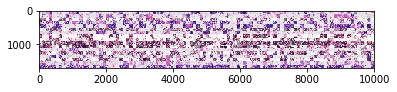

In [10]:
final_img = PIL.Image.fromarray(final_img_ar)
plt.imshow(final_img)
final_img.show()

(array([  330155.,  1449551.,  2193486.,  2619979.,  3073619.,  3205396.,
         3678877.,  4289948., 11150072., 36008917.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

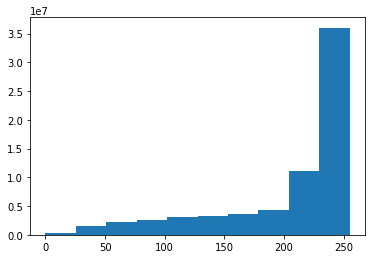

In [11]:
norm_x = final_img_ar.flatten()
plt.hist(norm_x)

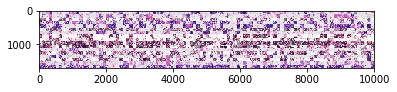

In [12]:
final_img_conv = final_img.convert(mode='P', palette='ADAPTIVE')
plt.imshow(final_img)
final_img_conv.show()

(array([  26318., 7919929., 4983606., 2016276., 1078243.,  515995.,
         245285.,  119198.,   67525.,   27625.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

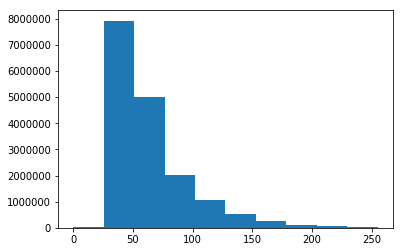

In [13]:
adapt_x = np.array(final_img_conv).flatten()
plt.hist(adapt_x)

In [14]:
print()

[158, 106, 230, 176, 211, 218, 36, 20, 31, 102, 153, 168, 220, 93, 107, 215, 95, 224, 85, 111, 161, 95, 34, 51, 162, 79, 86, 106, 96, 207, 232, 88, 154, 150, 161, 218, 27, 39, 100, 55, 39, 164, 217, 162, 152, 215, 244, 234, 56, 93, 140, 100, 56, 197, 153, 176, 165, 154, 46, 88, 49, 83, 106, 85, 68, 59, 92, 99, 109, 145, 42, 166, 222, 214, 182, 117, 150, 200, 100, 26, 90, 151, 56, 199, 202, 58, 150, 166, 141, 120, 142, 49, 57, 164, 210, 178, 95, 27, 155, 200, 57, 114, 114, 136, 119, 55, 141, 146, 112, 202, 207, 206, 150, 123, 106, 202, 177, 207, 57, 206, 56, 47, 197, 57, 83, 42, 46, 136, 122, 59, 159, 199, 135, 98, 54, 60, 80, 204, 96, 203, 100, 194, 53, 61, 232, 229, 234, 249, 248, 247, 232, 217, 231, 79, 39, 83, 212, 183, 208, 213, 199, 213, 115, 70, 112, 235, 199, 213, 210, 168, 205, 204, 151, 177, 234, 201, 231, 148, 102, 140, 173, 119, 150, 233, 184, 207, 179, 135, 170, 220, 216, 227, 105, 57, 104, 47, 25, 113, 236, 214, 217, 76, 40, 140, 208, 151, 206, 208, 166, 184, 141, 89, 135,

In [18]:
with open('slide_analysis_service/descriptors/palette.out', 'wb') as fp:
    pickle.dump(final_img_conv.getpalette(), fp)